In [1]:
from __future__ import print_function

import numpy as np

import sklearn

import pandas as pd

import tensorflow as tf

from tensorflow.contrib.tensor_forest.python import tensor_forest

from tensorflow.python.ops import resources

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)


# Ignore all GPUs, tf random forest does not benefit from it.

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [3]:
import os



#Extract feature and target np arrays (inputs for placeholders)

input_x = mnist.train.images

input_y = mnist.train.labels



# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_x, input_y, test_size = 0.25, random_state = 0)


# Parameters

num_steps = 10000 # Total steps to train

num_classes = 10 

num_features = 28*28 

num_trees = 16

max_nodes = 1000 


# Random Forest Parameters

hparams = tensor_forest.ForestHParams(num_classes=num_classes, num_features=num_features, num_trees=num_trees, max_nodes=max_nodes).fill()



# Build the Random Forest

forest_graph = tensor_forest.RandomForestGraphs(hparams)
# Input and Target placeholders 

X = tf.placeholder(tf.float32, shape=[None, num_features])

Y = tf.placeholder(tf.int64, shape=[None])

# Get training graph and loss

train_op = forest_graph.training_graph(X, Y)

loss_op = forest_graph.training_loss(X, Y)



# Measure the accuracy

infer_op, _, _ = forest_graph.inference_graph(X)

correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))

accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



# Initialize the variables (i.e. assign their default value) and forest resources

init_vars = tf.group(tf.global_variables_initializer(), resources.initialize_resources(resources.shared_resources()))

    

# Start TensorFlow session

sess = tf.Session()



# Run the initializer

sess.run(init_vars)


INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 16, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 28, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 10, 'num_features': 784, 'bagged_num_features': 784, 'bagged_features': None, 'regression': False, 'num_outputs': 1, 'num_output_columns': 11, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}


In [4]:
batch_size = 32
results = []

# Training

for i in range(1, num_steps + 1):

    _, l = sess.run([train_op, loss_op], feed_dict={X: X_train, Y:y_train})

    if i % 50 == 0 or i == 1:

        acc = sess.run(accuracy_op, feed_dict={X: X_test, Y: y_test})
        results.append(acc)
        print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))



# Test Model

print("Test Accuracy:", sess.run(accuracy_op, feed_dict={X: X_test, Y: y_test}))

Step 1, Loss: -1.375000, Acc: 0.495855
Step 50, Loss: -1001.000000, Acc: 0.923709
Step 100, Loss: -1001.000000, Acc: 0.923709
Step 150, Loss: -1001.000000, Acc: 0.923709
Step 200, Loss: -1001.000000, Acc: 0.923709
Step 250, Loss: -1001.000000, Acc: 0.923709
Step 300, Loss: -1001.000000, Acc: 0.923709
Step 350, Loss: -1001.000000, Acc: 0.923709
Step 400, Loss: -1001.000000, Acc: 0.923709
Step 450, Loss: -1001.000000, Acc: 0.923709
Step 500, Loss: -1001.000000, Acc: 0.923709
Step 550, Loss: -1001.000000, Acc: 0.923709
Step 600, Loss: -1001.000000, Acc: 0.923709
Step 650, Loss: -1001.000000, Acc: 0.923709
Step 700, Loss: -1001.000000, Acc: 0.923709
Step 750, Loss: -1001.000000, Acc: 0.923709
Step 800, Loss: -1001.000000, Acc: 0.923709


KeyboardInterrupt: 

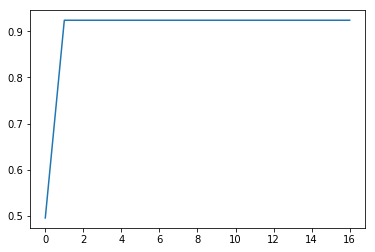

In [6]:
from matplotlib import pyplot as plt
plt.plot(range(len(results)),results)
plt.show()